## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
# mouse_metadata has Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)
#study_results.head()
# study_results has Mouse ID, Timepoint, Tumor Volume (mm3) Metastatic Sites
# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
#study_data_complete.count()
mice = study_data_complete['Mouse ID'].unique()
len(mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)
timept = study_data_complete['Timepoint'].unique() 
#create a column that has a merged value of Mouse Id and Timepoint
study_data_complete['Merged'] = study_data_complete['Mouse ID'] + study_data_complete['Timepoint'].astype(str)
#create dup_index to hold values of duplicate rows
dup_index = []
#study_data_complete['Merged'].value_counts()
#From <https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column> 
dup_values = study_data_complete['Merged'].duplicated()
for i in range(study_data_complete['Merged'].count()):
    if (dup_values[i] == True):
        dup_index.append(i)
#any(study_data_complete['Merged'].duplicated())
dup_index

# Drop all rows with missing information 
#cleaned_df = study_data_complete.dropna(how='any')




[909, 911, 913, 915, 917]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#print out all the data in study_data_complete for the indexes found in dup_index
for x in range(len(dup_index)):
    print(study_data_complete.iloc[dup_index[x]])


Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Merged                   g9890
Name: 909, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    5
Tumor Volume (mm3)     47.5704
Metastatic Sites             0
Merged                   g9895
Name: 911, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                   10
Tumor Volume (mm3)     49.8805
Metastatic Sites             0
Merged                  g98910
Name: 913, dtype: object
Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Fe

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop all rows with missing information 
cleaned_df = study_data_complete.drop_duplicates(subset=['Merged'])
cleaned_df.count()


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Merged                1888
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
mice = study_data_complete['Mouse ID'].unique()
len(mice)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Display a statistical overview
# We can infer the maximum allowable individual contribution from 'max'
regimens = cleaned_df['Drug Regimen'].unique()
#regimens
#cleaned_df.describe()
#cleaned_df
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_tumor_df = cleaned_df.groupby(['Drug Regimen'])
tumor_mean = grouped_tumor_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_tumor_df['Tumor Volume (mm3)'].median()
tumor_var = grouped_tumor_df['Tumor Volume (mm3)'].var()
tumor_sd = grouped_tumor_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_tumor_df['Tumor Volume (mm3)'].sem()
# Creating a new DataFrame using both duration and count
tumor_summary_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var,
                                "Standard Deviation": tumor_sd, "SEM": tumor_sem})
tumor_summary_df.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_tumor_df.agg({'Tumor Volume (mm3)' : ['mean', np.median, np.var, np.std, st.sem]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Merged
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


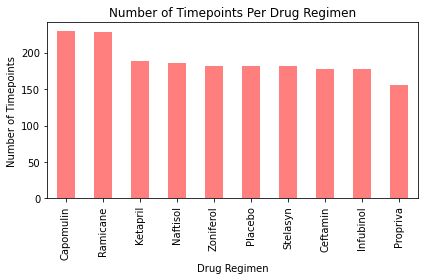

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Filter the data frame down to the columns we want
bar_data = cleaned_df["Drug Regimen"].value_counts()
#set the index to Drug Regimen
#bar_data = bar_data.set_index("Drug Regimen")
#    measure.append(cleaned_df.loc[cleaned_df['Drug Regimen'] == regimens(y)].count())
#measure = cleaned_df['Drug Regimen'].value_counts()
#use figsize figsize=(20,3)
bar_data.plot(kind="bar", color='r', alpha=0.5, align="center")
plt.title("Number of Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.tight_layout()

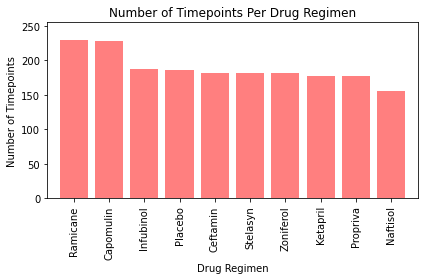

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure = cleaned_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimens))
# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, measure, color='r', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation='vertical')
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, measure.max()+25)
plt.title("Number of Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.tight_layout()

Text(0.5, 1.0, 'Female versus Male Mice')

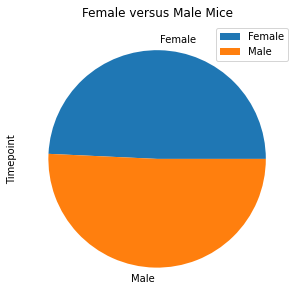

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = cleaned_df[["Sex","Timepoint"]].groupby("Sex").count()
pieplot = pie_data.plot(kind="pie", y="Timepoint", figsize=(5,5))
plt.title("Female versus Male Mice")

Text(0.5, 1.0, 'Female versus Male Mice')

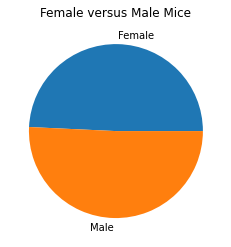

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for sections of the pie plot
labels = ["Female","Male"]
#values for the sections of the pie plot
values = pie_data['Timepoint']
plt.pie(values, labels=labels)
plt.title("Female versus Male Mice")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
quart_data = cleaned_df[["Mouse ID","Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]
# Start by getting the last (greatest) timepoint for each mouse
maxdata = quart_data['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
quart_data_max = quart_data.loc[quart_data["Timepoint"] == maxdata, :] 
# Put treatments into a list for for loop (and later for plot labels)
regimens_max = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
quart_data_max_thin = quart_data_max.loc[(quart_data_max["Drug Regimen"] == regimens_max[0]) | 
                                         (quart_data_max["Drug Regimen"] == regimens_max[1]) |
                                         (quart_data_max["Drug Regimen"] == regimens_max[2]) |
                                         (quart_data_max["Drug Regimen"] == regimens_max[3]), :]
quart_data_max_thin

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [15]:

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = quart_data_max_thin['Tumor Volume (mm3)']
#tumor_vol_data = []

for i in range(len(regimens_max)):

    # Locate the rows which contain mice on each drug and get the tumor volumes
    spec_tumor_vol_data = tumor_vol_data[quart_data_max_thin["Drug Regimen"] == regimens_max[i]]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = spec_tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"the lower quartile for {regimens_max[i]} is: {lowerq}")
    print(f"the upper quartile for {regimens_max[i]} is: {upperq}")
    print(f"the interquartile range for {regimens_max[i]} is: {iqr}")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    #print(f"Spc tumor is {spec_tumor_vol_data}")
    temp_data = []
    for x in spec_tumor_vol_data:
        #print(f"x is {x} ")
        if ((x < lower_bound) or (x > upper_bound)):
            temp_data.append(x)
            print("Append x")
    print(f"The outliers for {regimens_max[i]} are {temp_data}")
    #tumor_outliers = []
    


the lower quartile for Capomulin is: 32.37735684
the upper quartile for Capomulin is: 40.1592203
the interquartile range for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
The outliers for Capomulin are []
the lower quartile for Ramicane is: 30.981175224999998
the upper quartile for Ramicane is: 38.508305307499995
the interquartile range for Ramicane is: 7.527130082499998
Values below 19.690480101250003 could be outliers
Values above 49.79900043124999 could be outliers
The outliers for Ramicane are []
the lower quartile for Infubinol is: 62.75445141
the upper quartile for Infubinol is: 67.68556862
the interquartile range for Infubinol is: 4.9311172099999965
Values below 55.35777559500001 could be outliers
Values above 75.08224443499999 could be outliers
The outliers for Infubinol are []
the lower quartile for Ceftamin is: 61.43389223
the upper quartile for Ceftamin is: 67.52748237
the interquartile range for C

([<matplotlib.axis.XTick at 0x23fe0e0af10>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

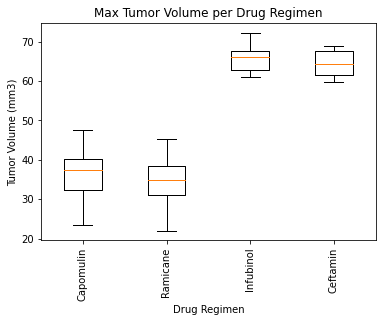

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    # Locate the rows which contain mice on each drug and get the tumor volumes
x1 = quart_data_max.loc[(quart_data_max["Drug Regimen"] == regimens_max[0]), "Tumor Volume (mm3)"]   
x2 = quart_data_max.loc[(quart_data_max["Drug Regimen"] == regimens_max[1]), "Tumor Volume (mm3)"]
x3 = quart_data_max.loc[(quart_data_max["Drug Regimen"] == regimens_max[2]), "Tumor Volume (mm3)"]
x4 = quart_data_max.loc[(quart_data_max["Drug Regimen"] == regimens_max[3]), "Tumor Volume (mm3)"]

data = [x1,x2,x3,x4]
t = [1,2,3,4]
fig1, ax1 = plt.subplots()
ax1.set_title('Max Tumor Volume per Drug Regimen')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data)
plt.xticks(t, regimens_max, rotation='vertical')



## Line and Scatter Plots

(22.0, 46.0)

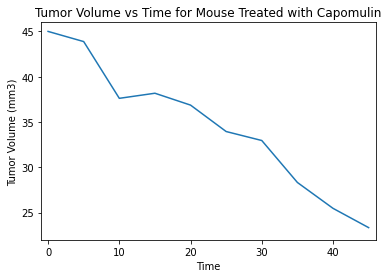

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data_cap = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
data_cap_mouse = data_cap.loc[data_cap["Mouse ID"] == "s185"]
data_cap_mouse
points = data_cap_mouse['Tumor Volume (mm3)']
max = data_cap_mouse['Timepoint'].max()+5
x_axis_data = np.arange(0,max,5)
# Plot the line
plt.plot(x_axis_data, points)
# Add labels to X and Y axes :: Add title
plt.title("Tumor Volume vs Time for Mouse Treated with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
# Set your x and y limits
plt.xlim(-1, 46)
plt.ylim(22, 46)

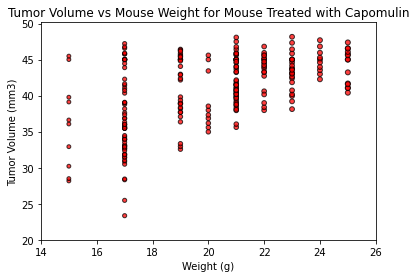

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#data_cap
spoints = data_cap['Tumor Volume (mm3)']
sx_axis = data_cap['Weight (g)']
# The maximum x value for our chart will be 100
sx_limit = sx_axis.max()
sy_limit = spoints.max()

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(sx_axis, spoints, marker="o", facecolors="red", edgecolors="black",
            s=sx_axis, alpha=0.75)

# The y limits of scatter plot 
plt.ylim(20, sy_limit+2)

# The x limits of scatter plot 
plt.xlim(14, sx_limit+1)

# Add labels to X and Y axes :: Add title
plt.title("Tumor Volume vs Mouse Weight for Mouse Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Prints the scatter plot to the screen
plt.show()

## Correlation and Regression

The correlation between both factors is 0.53


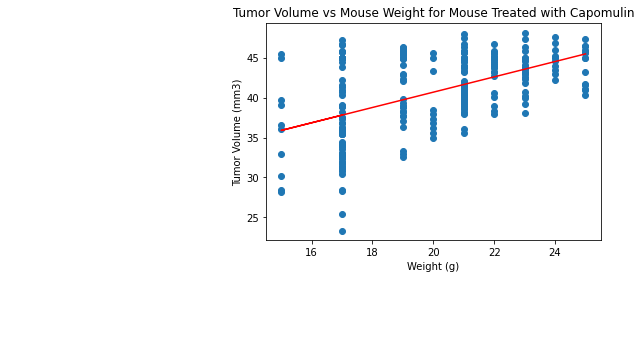

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(sx_axis,spoints)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_axis, spoints)
regress_values = sx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_axis,spoints)
plt.plot(sx_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume vs Mouse Weight for Mouse Treated with Capomulin")
plt.show()